In [1]:
## Importing Libraries ##

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data set ##
ds = pd.read_csv("C:/Users/Neeraj/Desktop/ipl_data.csv")
ds.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18


In [2]:
## Visualizing Data ##
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            8381 non-null    float64
 13  isNoBall          1093 non-null    float64
 14  Byes              673 non-null     float64
 15  LegByes           4001 non-null    float64
 16  Penalty           2 

In [3]:
## Finding the top batsman by runs ## LOVE VIRAT KOHLI ##
top_batsman = ds.groupby("batsman")["batsman_runs"].sum().sort_values(ascending = False).head(10)
top_batsman

batsman
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

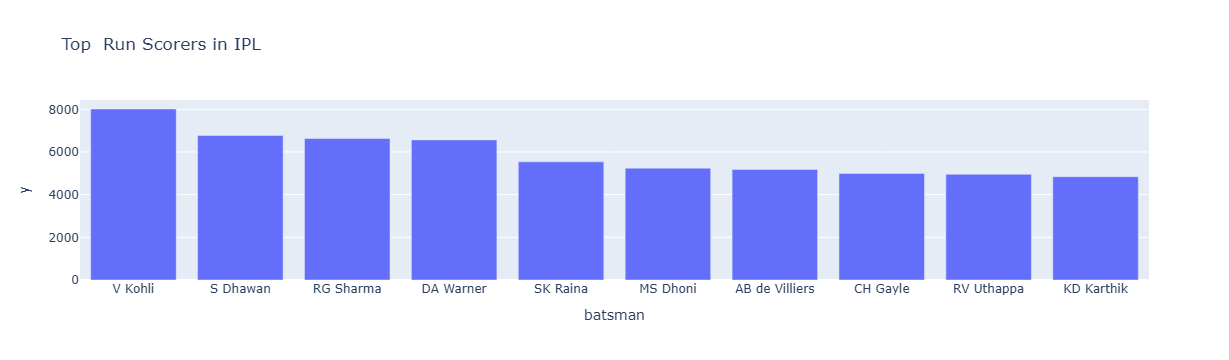

In [4]:
## Plotting Graph Using Plotly ##
import plotly.express as pt
pt.bar(top_batsman, x=top_batsman.index, y=top_batsman.values, title="Top  Run Scorers in IPL")


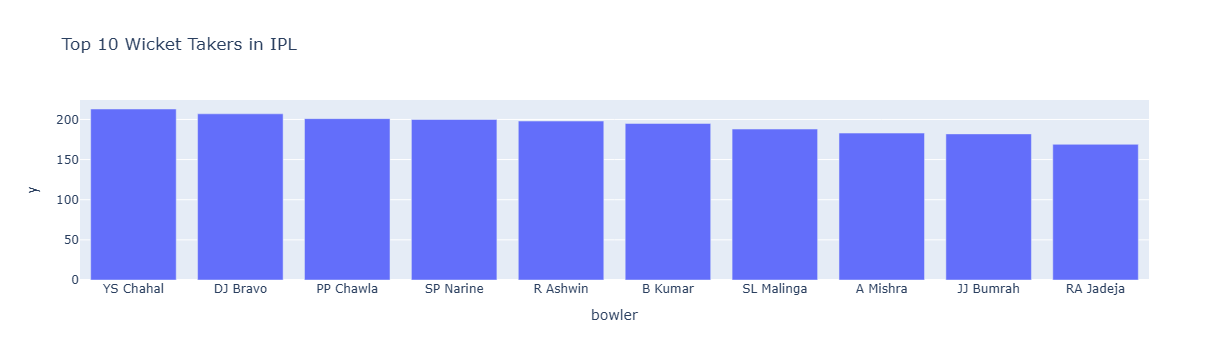

In [5]:
## Finding  and Plotting most number of wickets ## 

wickets = ds[ds["player_dismissed"].notnull()]
top_bowlers = wickets.groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).head(10)
pt.bar(top_bowlers, x=top_bowlers.index, y=top_bowlers.values, title="Top 10 Wicket Takers in IPL")


In [ ]:
## Finding the number of extras givien by top bowlers ##

bowler_extras = ds.groupby("bowler")["extras"].sum().sort_values(ascending=False).head(10)
bowler_extras



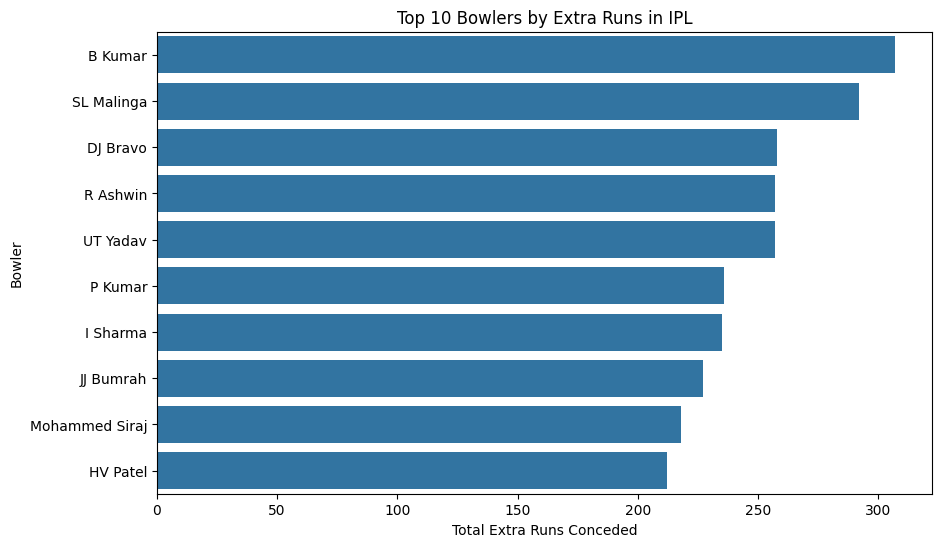

In [7]:
## Plotting using matplotlib and seaborn ##

plt.figure(figsize=(10,6))
sns.barplot(x=bowler_extras.values, y=bowler_extras.index)
plt.xlabel("Total Extra Runs Conceded")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers by Extra Runs in IPL")
plt.show()


Oberservation :

We see that even though more wickets taken by bowlers matter but we should also consider extras given by them
eg - Sl Malinga even though he is in top players by wicket he is also in 2nd place to give extras 

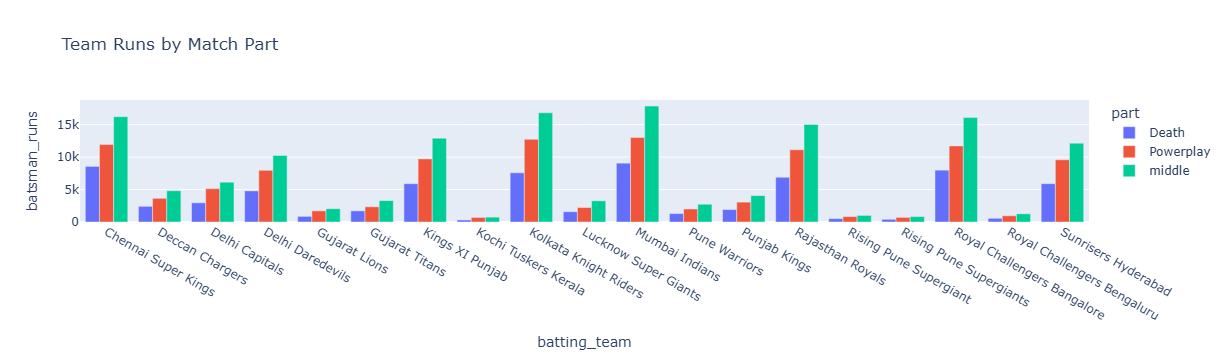

In [10]:
## Splitting Runs made by team in parts to see in which overs teams performance ##

ds['part'] = ds['over'].apply(lambda x: 'Powerplay' if x<=6 else( 'middle' if x<=15 else 'Death'))

part_runs = ds.groupby(["batting_team", "part"])["batsman_runs"].sum().reset_index()

## Plotting Temas and runs made by them in diffrent parts of overs ##
pt.bar(part_runs, x="batting_team", y="batsman_runs", color="part", barmode="group", title="Team Runs by Match Part")



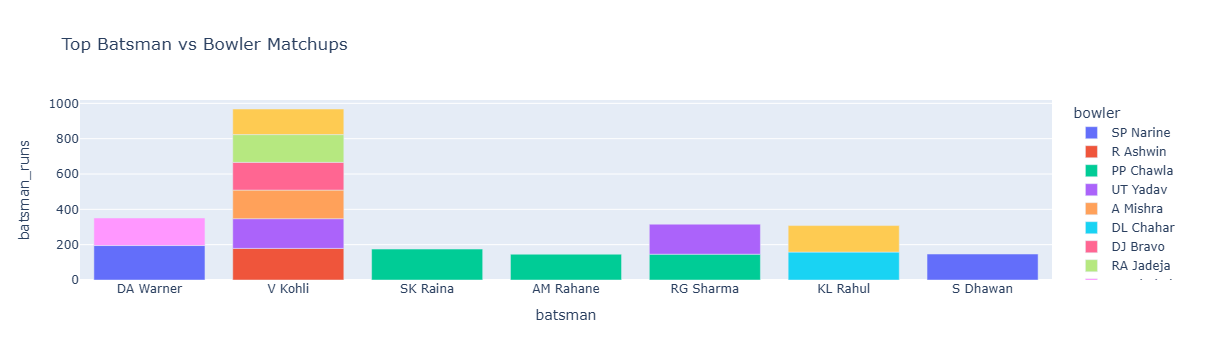

In [11]:
## Grouping Important matchups in bowlers and Batsmans ##

matchup = ds.groupby(["batsman","bowler"])["batsman_runs"].sum().reset_index()
matchup = matchup.sort_values("batsman_runs", ascending=False).head(15)
pt.bar(matchup, x="batsman", y="batsman_runs", color="bowler", title="Top Batsman vs Bowler Matchups")
